# Projeto 2 - Ciência dos Dados

Nome: _____

Nome: _____

Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
# Classificador automático de sentimento


## Preparando o ambiente no jupyter:

In [1]:
%%capture

#Instalando o tweepy
!pip install tweepy

In [2]:
%matplotlib inline
import tweepy
import math
import os.path
import json
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd

___
## Autenticando no  Twitter

* Conta: @EikiMarcelo

___
## Etapas do projeto:

### Escolha de um produto e coleta das mensagens


Capturando os dados do twitter:

Salvando os dados em uma planilha Excel:

___
### Classificando as mensagens na coragem

Esta etapa é manual. Faça a mesma pelo Excel.

In [3]:
#def de limpar palavras
import re 

def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    punctuation = '[!\-.:?;]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed
#Excel
skol_read=pd.read_excel("skol.xlsx")

In [4]:
#Limpeza e separação por relevancia
skol_read.Treinamento.apply(cleanup)
skol_read.rename(columns={'Unnamed: 1':'relevante'},inplace=True)
#Relevante 0
skol_relevante_0=skol_read[skol_read.relevante==0]

#Relevante 1
skol_relevante_1=skol_read[skol_read.relevante==1]
print ("Len relevante 0:",len(skol_relevante_0),"",
       "Len relevante 1:",len(skol_relevante_1))

Len relevante 0: 185  Len relevante 1: 115


In [5]:
# Separando as palavras Relevancia 1
" ".join(skol_relevante_1["Treinamento"]).split()
palavras=pd.DataFrame("".join(skol_relevante_1["Treinamento"]).split())
palavras_relevancia_1=palavras[0].value_counts()
#Tabela Relativa 
palavras_relevancia_1_relativa=palavras[0].value_counts(True)

In [6]:
# Separando as palavras Relevancia 0
" ".join(skol_relevante_0["Treinamento"]).split()
palavras=pd.DataFrame("".join(skol_relevante_0["Treinamento"]).split())
palavras[0].value_counts()
palavras_relevancia_0=palavras[0].value_counts()
palavras_relevancia_0

#Tabela Relativa 
palavras_relevancia_0_relativa=palavras[0].value_counts(True)

In [7]:
print (palavras_relevancia_0_relativa)

skol                 0.040550
de                   0.034556
e                    0.023625
a                    0.022214
beats                0.014457
o                    0.013399
eu                   0.013047
da                   0.012341
que                  0.011636
pra                  0.010578
uma                  0.010226
é                    0.009520
do                   0.009520
me                   0.008110
com                  0.007757
no                   0.007052
q                    0.006347
não                  0.006347
em                   0.005994
na                   0.005642
um                   0.005642
se                   0.005642
tu                   0.005289
bebendo              0.004937
mano                 0.004584
vai                  0.004584
mas                  0.004231
toma                 0.004231
só                   0.004231
para                 0.004231
                       ...   
anúncios             0.000353
bitche               0.000353
amante    

___
### Montando o Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

### <font color = "red"> Lista Prob Relevância 0 (Lista_prob_0):

In [8]:
i=0
lista_frase=[]
lista_palavra = []
while i <=299:
    a=skol_read.iloc[i,0]
    lista_frase.append(a)
    x = lista_frase[i].split(" ")
    lista_palavra.append(x)
    i+=1
lista_palavra



t = 1/(len(palavras_relevancia_0_relativa)+len(palavras_relevancia_0_relativa))

i = 0
produto_prob = []
while i <= 299:
    k = 0
    mult_prob = []
    while k < len(lista_palavra[i]):
        palavra = lista_palavra[i][k]
        if palavra not in palavras_relevancia_0_relativa:
            prob = t
        else:
            prob = palavras_relevancia_0_relativa[palavra] + t
        mult_prob.append(prob)
        k+=1
    #Aqui ja tem lista da probabilidade das palavras
    #print(mult_prob)
    p = 0
    for e in mult_prob:
        if p == 0:
            p = e
        else:
            p = p*e
    produto = p
    produto_prob.append(produto)
    i+=1
Lista_prob_0 = produto_prob

### <font color = "red" > Lista Prob Relevância 1 (Lista_prob_1):

In [9]:
i=0
lista_frase=[]
lista_palavra = []
while i <=299:
    a=skol_read.iloc[i,0]
    lista_frase.append(a)
    x = lista_frase[i].split(" ")
    lista_palavra.append(x)
    i+=1
lista_palavra



t = 1/(len(palavras_relevancia_1_relativa)+len(palavras_relevancia_1_relativa))

i = 0
produto_prob = []
while i <= 299:
    k = 0
    mult_prob = []
    while k < len(lista_palavra[i]):
        palavra = lista_palavra[i][k]
        if palavra not in palavras_relevancia_1_relativa:
            prob = t
        else:
            prob = palavras_relevancia_1_relativa[palavra] + t
        mult_prob.append(prob)
        k+=1
    #Aqui ja tem lista da probabilidade das palavras
    #print(mult_prob)
    p = 0
    for e in mult_prob:
        if p == 0:
            p = e
        else:
            p = p*e
    produto = p
    produto_prob.append(produto)
    i+=1
Lista_prob_1 = produto_prob

### <font color = "red"> Criando a lista analisadora:

In [10]:
lista_analise = []

i=0
analise = 0
while i< len(Lista_prob_1):
    if Lista_prob_1[i] > Lista_prob_0[i]:
        analise = 1
    else:
        analise = 0
    lista_analise.append(analise)
    i+=1
print(lista_analise)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]


### <font color = "red"> Validando as analises:

#### Adicionando a coluna do resultado:

In [11]:
skol_read["Analises"] = lista_analise
skol_read

,Treinamento,relevante,Analises
0,rt @2kdaladeira: @whsallas @silva22anny tbm ma...,0,1
1,olha gente elas bebendo suco😍😍 com essas caras...,0,1
2,um open de skol beats em limeira seria uma boa...,1,1
3,@bonagabriella kkkkk tem coisas q merecem um r...,0,1
4,@cecitoptop aiai tá louca \nnem skol beats na ...,0,1
5,@qgdaanitta representa a skol como ninguém \nr...,0,1
6,rt @sggrazii: skol beats e ice é exceção https...,0,1
7,@skolvikings_br @billsbrazil @enefeudazueira c...,0,1
8,rt @daumasgeo: óbvio que ela foi embora tava d...,1,1
9,rt @netoverissimom: dia de skol😂🍺☀️ https://t....,0,0


In [12]:
i = 0
verifica = []
while i < len(skol_read):
    ver = False
    if skol_read["relevante"][i] == skol_read["Analises"][i]:
        ver = True
    verifica.append(ver)
    i+=1

In [13]:
skol_read["Verifica"] = verifica
skol_read['Verifica'].value_counts(True)

True     0.606667
False    0.393333
Name: Verifica, dtype: float64

___
### Verificando a performance

Agora você deve testar o seu classificador com a base de Testes.

In [14]:
i = 0
contagem_verdadeiro_positivo = 0
contagem_verdadeiro_negativo = 0
contagem_falso_positivo = 0
contagem_falso_negativo = 0

while i < len(skol_read):
    if skol_read["Verifica"][i] == True:
        if skol_read["relevante"][i] == 1:
            contagem_verdadeiro_positivo+=1
        else:
            contagem_verdadeiro_negativo+=1
    else:
        if skol_read["relevante"][i] == 1:
            contagem_falso_positivo+=1
        else:
            contagem_falso_negativo+=1
    i+=1
            

In [15]:
porc_v_n = contagem_verdadeiro_negativo/300
porc_v_p = contagem_verdadeiro_positivo/300
porc_f_n = contagem_falso_negativo/300
porc_f_p = contagem_falso_positivo/300

In [16]:
print(porc_f_n, porc_f_p, porc_v_n, porc_v_p)
lispie = [porc_f_n, porc_f_p, porc_v_n, porc_v_p]
dic = {"V_N":porc_v_n,
"V_P":porc_v_p,
"F_P":porc_f_p,
"F_N":porc_f_n}


0.38333333333333336 0.01 0.23333333333333334 0.37333333333333335


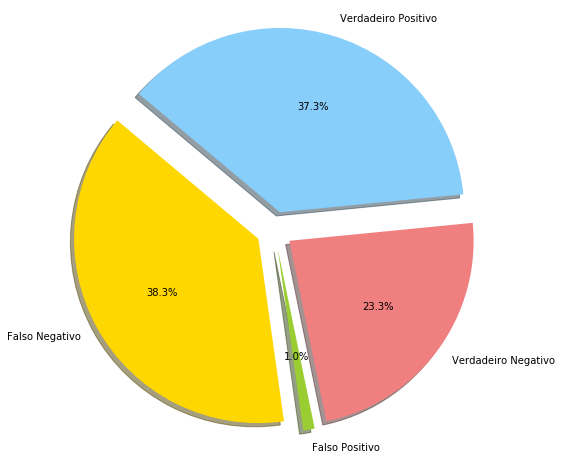

In [26]:
# Data to plot
labels = 'Falso Negativo', "Falso Positivo", "Verdadeiro Negativo", 'Verdadeiro Positivo'
sizes = [porc_f_n, porc_f_p, porc_v_n, porc_v_p]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize=[8,8])
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

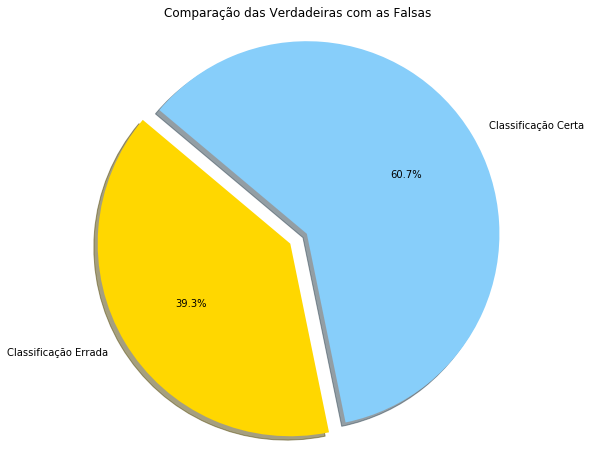

In [32]:
classi_true = porc_v_n + porc_v_p
classi_false = porc_f_n + porc_f_p

labels = "Classificação Errada", "Classificação Certa"
sizes = [classi_false, classi_true]
colors = ['gold', 'lightskyblue']
explode = (0.05, 0.05)

# Plot
plt.figure(figsize=[8,8])
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Comparação das Verdadeiras com as Falsas")
plt.axis('equal')
plt.show()

___
### Concluindo

## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* Montar um dashboard que periodicamente realiza análise de sentimento e visualiza estes dados

# Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**